### NAME : S.Sanjith
### ID NO : 190562G
### COURSE CODE : EN2550

In [8]:
#Importing libraries
import matplotlib.pyplot as plt 
from matplotlib import cm
import numpy as np
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D

im_dir = r'E:/Semester 4/EN2550_FundamentalsOfImageProcessing/Fun-Time/Exercises/images/'

In [9]:
# Q1
f1=cv.imread(im_dir+'butterfly.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.float32)
assert f1 is not None

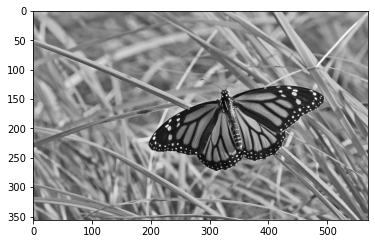

In [10]:
fig, ax =plt.subplots() 
ax.imshow(f1, cmap='gray',vmin=0,vmax=255)
plt.show()

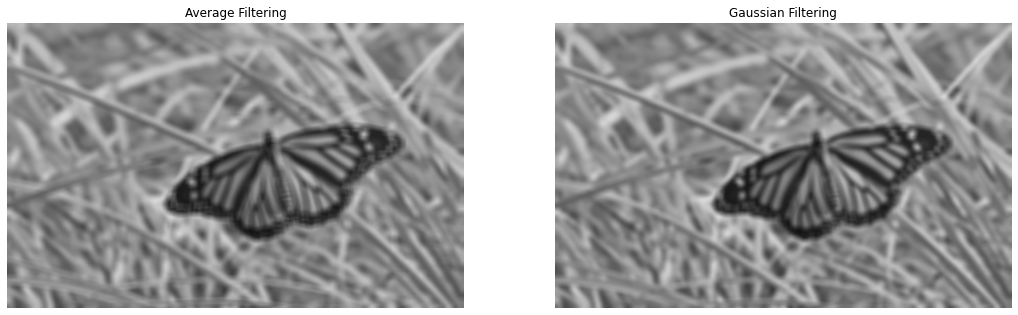

In [11]:
kernel_a=1./81*np.ones((9,9))
f1_a=cv.filter2D(f1,-1,kernel_a)


sigma=4
kernel_g=cv.getGaussianKernel(9,sigma)
f1_g=cv.sepFilter2D(f1,-1,kernel_g,kernel_g)

fig, ax=plt.subplots(1,2,figsize=(18,6))
ax[0].imshow(f1_a,cmap='gray',vmin=0,vmax=255)
ax[0].set_title("Average Filtering")
ax[1].imshow(f1_g,cmap='gray',vmin=0,vmax=255)
ax[1].set_title("Gaussian Filtering")
for i in range(2):
    ax[i].axis("off")
plt.show()

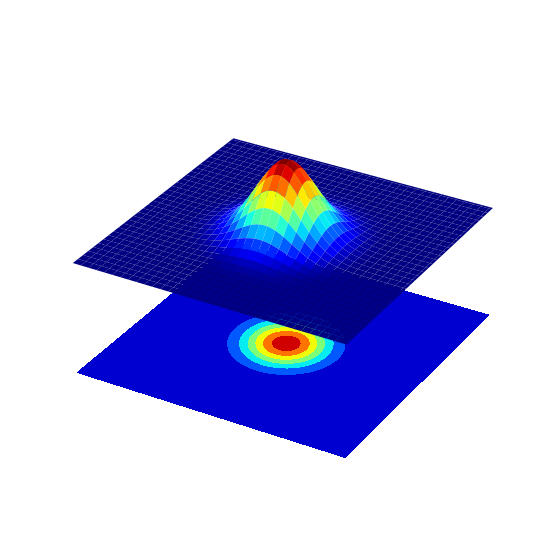

In [12]:
fig  = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')

step = 0.1
X=np.arange(-5,5+step,step)
Y=np.arange(-5,5+step,step)

sigma=1
XX, YY =np.meshgrid(X,Y)
g=np.exp(-(XX**2+YY**2)/(2*sigma**2))

surf = ax.plot_surface(XX,YY,g, cmap=cm.jet,linewidth=0,antialiased=True)


cset=ax.contourf(XX,YY,g,zdir='z',offset=np.min(g)-1.5,cmap=cm.jet)
ax.set_zlim(np.min(g)-2,np.max(g))

ax.axis('off')


plt.show()


In [13]:
# Q3
f2=cv.imread(im_dir+ 'contact_lens.tif',cv . IMREAD_GRAYSCALE).astype(np.float32)
assert f2 is not None

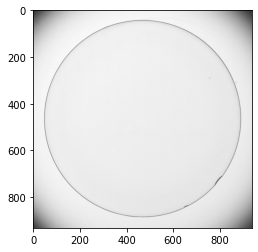

In [14]:
fig, ax =plt.subplots() 
ax.imshow(f2,cmap='gray',vmin=0,vmax=255)
plt.show()

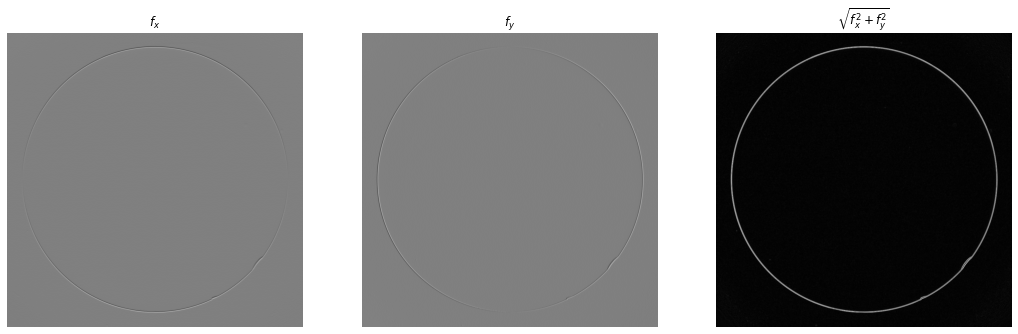

In [15]:
kernel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]],np.float32)
kernel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],np.float32)

f_x=cv.filter2D(f2,-1,kernel_v)
f_y=cv.filter2D(f2,-1,kernel_h)

grad_mag=np.sqrt(f_x**2+f_y**2)

fig, ax=plt.subplots(1,3,figsize=(18,6))

ax[0].imshow(f_x,cmap='gray',vmin=-1020,vmax=1020)
ax[0].set_title("$f_x$")
ax[1].imshow(f_y,cmap='gray',vmin=-1020,vmax=1020)
ax[1].set_title("$f_y$")
ax[2].imshow(grad_mag,cmap='gray')
ax[2].set_title("$\sqrt{f_x^2+f_y^2}$")
for i in range(3):
    ax[i].axis("off")

In [16]:
# Q4
f3=cv.imread(im_dir+'tom.jpg',cv . IMREAD_GRAYSCALE).astype(np.float32)
assert f3 is not None

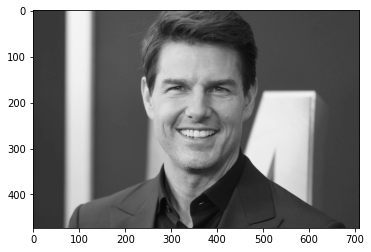

In [17]:
fig, ax =plt.subplots() 
ax.imshow(f3,cmap='gray',vmin=0,vmax=255)
plt.show()

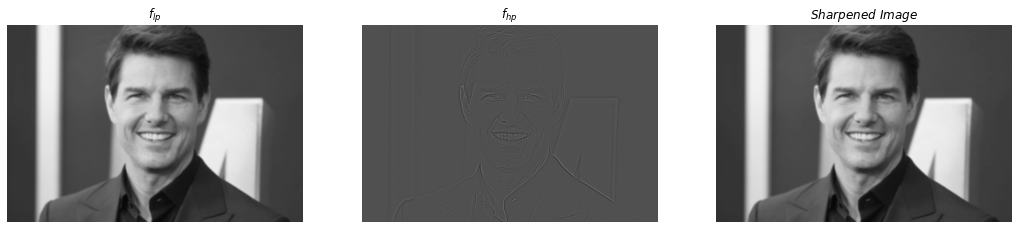

In [18]:
sigma=2
gaussian_1d=cv.getGaussianKernel(5,sigma)

f3_lp= cv.sepFilter2D(f3,-1,gaussian_1d,gaussian_1d)

f3_hp=f3-f3_lp

f_sharpened =cv.addWeighted(f3,1.0,f3_hp,1.5,0)

fig, ax=plt.subplots(1,3,figsize=(18,6))
ax[0].imshow(f3_lp,cmap='gray',vmin=0,vmax=255)
ax[0].set_title("$f_{lp}$")
ax[1].imshow(f3_hp+80,cmap='gray',vmin=0,vmax=255)
ax[1].set_title("$f_{hp}$")
ax[2].imshow(f3_lp,cmap='gray',vmin=0,vmax=255)
ax[2].set_title("$Sharpened\ Image$")
for i in range(3):
    ax[i].axis("off")